<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez15_15042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graphviz package permette di vedere dangeoun graph (tipo albero) e altre cose.

###**Il modello sklearn utilizza il gini index (non confondere con il gini coefficient), dove la probability del Gini index si interpreta come la stessa cosa della purezza, perchè ha comunque un'interpretazione probabilistica. Il Gini index è la variazione della purity** Il Gini index somma su tutte le classi, quindi mi consente di tenere conto di più di una classe.

**Sample** è la dimensione del gruppo all'interno del nodo. Cioè posso richiedere che le le foglie dell'albero abbiamo una dimensione maggiore di 3 passeggeri (nell'esempio del titanic).

https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb vecchio nb per titanic (il pacchetto è cambiato).

L'hyperparam depth controlla il numero di split che si possono fare: controllo il max numero di split in ogni branch. Si controlla prima di tutto la depth per controllare l'overfitting.

Vedremo tree methods.

**Overfitting**: può succedere che il modello sia overtrained, ovvero acquisisca conoscenza specifica mentre fa training, ma ciò che impara vale solo per il training set e il modello quindi non è generalizzabile. (L'abbiamo visto ieri).

**La depth di un albero può servire per evitare questo overfitting.** 

##Controllare la degradazione dell'efficienza dal training al test set, e questo controllo si fa per ogni modello. 

Controllare la maximum depth per non ottenre delle foglie che contengono gruppi con una singole unità diciamo. 

Un altro modo più accurato sarebbe quello del tree pruning: costruire un albero molto complesso con una depth alta e poi torno indietro tagliando i rami inutili per prevenire l'overfitting. (Molto complicato da usare).

Si può fare regression con tree model (e con tutti i CART). Tutto questo è dentro sklearn. Si può fare questo, ma è pericoloso fare regression con tree. 


**Il problema con gli alberi è che non sono stabili: trees have a high variance of the results**. Dobbimo settare il random state all'interno della call di sklearn.tree. Questo equivale a settarlo prima della funzione ma chiamarlo nella sklearn è più elegante e sicuro dai bug che potrebbero esserci nel cambio di codice.

La high variance deriva del fatto che non posso esaminare tutte le scelte possibili per ogni variabili, soprattutto per quelle continue (perchè ho inifinità di modi di dividere la variabile continue). Non si può riolvere il problema esplorando tutta la likelihood space per ottimizzare la posterior che sia l'ottimizzazione del problema. **Quindi si possono dettare dei random guess per inizializzare sclete che rendono il problema possiblei a livello computazionale.**

Altro porblema quando faccio la scelta sul gini index, la faccio sul singolo nodo. Se scelgo un gini index non ottimale al primo nodo, al nodo successivo potrei avere un gini migliore: ottimizzazione locale.

Questi 2 problemi rendono i single trees inutilizzabili.

**Different trees lead to different results. Per questo motivo i single trees non sono utilizzabili.** 
##Per ovviare a questo problema si può far correre il codice molte volte ed esaminare i risultati scegliendo il risultato più comune.
Questo tipo di metodo si chiama ENSAMBLE METHODS.

I due ENSAMBLE METHODS che guardiamo oggi sono:

for both method we have regressor and classifiers. 

- **RANDOM FORESTS** 

Tree runs in parallel. The number of tree is proportional to the number of variables and the number of observation. Each trees uses a random subset of observation or features, or both. Each trees is a small tree that uses fewer than the total number of features, fewer than the total number of observations. Then we end up eith a set of prediction statistically idependent (there is no covariance between the results).

**The classifier is the majority vote, i.e. what was the class predicted mostly.** In the titanic example if I get 90 trees out of 100 giving the person to be in the survival class, I interpret it as the 90% for the person to survive. This in not all true because to have a probabilistic interpretation I will have to understand hat the posterior is based on the prior. The prior will be embedded on all of the coiche the tree does. So I don't have a robust probilistic interpretation of the result.

The regression result is the average of all the result.

**HYPERPARAMETER (for the random forest classifiers):** n_estimator: how many trees I will use in my forest. Easly we can choose an hundered of trees (only if we have an hundred of observation, otherwise we will end in an bias method).
Bootstrap: wether or not I am gonna use a subsets of feature or observation at each tree or I am gonna use all feature in the observations. We will set always bootstrap=True.
warm_start: allows to save partially trained model. It is used for hardly intense model. 

- **GRADIENT BOOSTED TREES**

Trees runs in series and each tree uses (different) weights for the features, learnign the weights from the result of previous tree. And this weights are added to the next tree. So each tree learn what were the feature that were important to make the classification. Adding some randomness will converge the tree more rapidly. 

The last tree has the prediction, so unlike random forest, we don't to worry about the result.

**HYPERPARAMETER (for gradient boosted regressor):** learning_rate (like in the gradient descent, to set how large is the step of the iteration during optimization), here it will mean how cloose I will inheriting the weights that I learned in the previous step. High learning rate will lead to a faster convergence, but it might lead to a local minimum. 
subsample: size of the variable that I can use at each step of the fraction of the sample to be used for fitting. Defalult values is 1, all of the data and feature at every tree, choosed with some stocasticity.

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import os
import json

In [2]:
#serve per vedere un tree graph
import graphviz

#ESERCIZIO 

https://github.com/fedhere/MLPNS2021/blob/main/CART/higgsbosonSearch.ipynb

Dati presi da kaggle data challenge, sul bosone di Higgs. 

Use gradient boosted trees and random forest both classifier to predict the kind of paricle, and for regressor the mass of the particles.
**Make a plot of the covariance to get a sense of the correlation between variable, altough in tree mehods we don't need to care about covariance.**

In qesto ambito dell'higgs discovery, il gradient boosted trees si è dimostrato migliore delle neural netowrk ad LHC. Le NN hanno un'accurateza migliore, ma il gradient boosted trees consente di usare facilmente più tipi di variabili (numeriche e categoriche).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
cd drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


In [6]:
ls kaggle.json

kaggle.json


In [7]:
!chmod 600 kaggle.json

In [8]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-08 09:30:51           4617  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2654  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            284  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            643  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [10]:
!mkdir kaggleHiggs

mkdir: cannot create directory ‘kaggleHiggs’: File exists


In [11]:
cd kaggleHiggs/

/content/drive/My Drive/MLPNS/kaggleHiggs


In [12]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv  training.csv
random_submission.zip                    test.zip  training.zip


In [13]:
!kaggle competitions download -c higgs-boson

HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv  training.csv
random_submission.zip                    test.zip  training.zip


In [15]:
!unzip training.zip
!unzip test.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [16]:
higgsdata = pd.read_csv("training.csv")

In [17]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [18]:
import sklearn
import matplotlib as pl

Per vedere la **codipendenza** dei dati, possiamo usare:

se i dati NON presentano covariance i plot sono tutti tondi ecc.. se c'è covariance ottengo delle righe e forme strane. Ci mette tanto tempo perchè ho un sacco di dati. 

In [19]:
#pd.plotting.scatter_matrix(higgsdata)

Se facciamo un hist delle variabili mi accorgo che ci sono missing value codificati con i "-999.00" e questi devo rimuoverli altrimenti il modello li tratta come numeri. Vediamo quante ce ne sono per ognuna delle colonne e decido se togliere la colonna o togliere le osservaizoni che hanno alcune colonne -999.00.

La cosa migliore da fare è sostiutire i -999.00 con un NaN in tutto il df e poi posso vedere quanti NaN ci sono e posso poi comodamenti rimuoverli con dropna. 

(array([177457.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  72543.]),
 array([-999.    , -898.2497, -797.4994, -696.7491, -595.9988, -495.2485,
        -394.4982, -293.7479, -192.9976,  -92.2473,    8.503 ]),
 <a list of 10 Patch objects>)

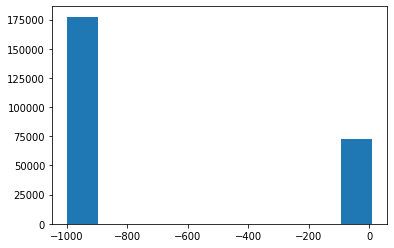

In [20]:
#ESEMPIO vedo quanti -999 ho per la colonna DER_deltaeta_jet_jet:
pl.pyplot.hist(higgsdata.DER_deltaeta_jet_jet)

Rimpiazzo i -999.00 con dei NaN

In [21]:
higgsdata = higgsdata.replace(-999.00, np.nan)

In [22]:
higgsdata.isna().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

###**Come detto avevamo un sacco di NaN, e decidiamo di toglierli**

In [23]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,1.258,-1.414,NaN,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,349996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,1.162,-1.345,NaN,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,120.462,1.202,0.529,NaN,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,55.859,0.999,1.414,NaN,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


In [24]:
higgsdata = higgsdata.dropna(axis=0, how='any')
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,349976,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,225.261,1.783,1.090,0.503,32.004,0.599,-0.013,57.056,-0.924,1.503,42.299,1.408,228.186,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200,0.001503,s
249980,349980,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,189.198,1.951,0.304,0.000,25.844,1.159,0.823,50.416,-0.315,-1.558,2.113,1.116,237.326,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938,0.018636,s
249985,349985,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,327.502,2.163,0.490,0.027,42.495,1.980,2.239,91.908,0.851,-3.050,41.247,-2.575,402.114,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099,0.018636,s
249993,349993,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,610.482,1.354,-0.634,0.000,27.364,2.403,1.348,37.052,1.775,-1.689,67.702,-1.768,694.010,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066,0.001503,s


In [25]:
higgsdata.isna().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [26]:
#si potevano togliere le colonne anche in maniera un po' più "controllata" in base a quanti NaN ci sono
#remove=[]
#for i in higgsdata.columns:
# if higgsdata[i].isnull().sum()>40000
#   remove=remove+[i]

#higgsdata.drop(columns=remove, inplace=True)

Andrebbe rimosso anche l'EventID, perchè potrebbe modificare le scelte che faccio.

In [27]:
higgsdata.drop(columns=['EventId'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
higgsdata.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s


Adesso vorrei rimuovere la colonna label e weight dal dataframe, ma prima me le salvo in due vettori. This will be my target variables for, respectively, classification and regression.

Per evitare che le persone possano imbrogliare, o creare modello specifici per questo set di dati, i dati kaggle sono divisi in train e test set, in cui i dati del test non hanno le label in questo caso. Siccome il test set è blinded, non posso sapere se il mio modello funziona bene o no. Quindi devo prendere il training set e dividerlo nel mio train e test set e provare il mio modello sui set che ho creato io, e poi applicare il modello al test set di kaggle. Ecco perchè utilizzamo solo il training set per il momento.

In [29]:
label = np.array(higgsdata.Label)
label

array(['s', 'b', 's', ..., 's', 's', 'b'], dtype=object)

In [30]:
weight = np.array(higgsdata.Weight)
weight.shape

(68114,)

In [31]:
higgsdata = higgsdata.drop(labels=['Label'], axis=1)
higgsdata = higgsdata.drop(labels=['Weight'], axis=1)

In [32]:
higgsdata.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


#**OGNI VOLTA CHE TOLGO DELLE OSSERVAZIONI, CALCOLO QUANTA PERCENTUALE DI OSSERVAIZONI HO ELIMINIATO DAL MIO DATASET**

higgsdata.Label.unique ci permette di sapere quali sono gli unique value in this categorical, ovvero ritorna gli elementi che compaiono almeno una volta nella colonna, ad esempio. 

In [33]:
#Adesso, prima di creare il train_test_split dobbiamo ricordarci di standardizzare i dati con sklearn.preprocessing.
from sklearn import preprocessing

higgsdata_scaled = pd.DataFrame(sklearn.preprocessing.scale(higgsdata[higgsdata.columns],
                                                            axis=0), columns = higgsdata.columns)


In [34]:
from sklearn.model_selection import train_test_split

#Per splittare i dati va anche bene 75% e 25% se sono molto grandi. 

X_traindata, X_testdata, y_trainlabel, y_testlabel = train_test_split(higgsdata_scaled[higgsdata_scaled.columns], 
                    label, train_size=0.75, test_size=0.25, random_state=1) 

In [35]:
higgsdata_scaled.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.257671,0.532835,0.474611,-1.093454,-0.870648,-0.632428,0.987313,1.378045,0.515495,-0.643135,0.092057,0.820325,-0.662199,-0.440631,0.865134,0.208926,-0.028037,1.901426,-1.352776,-0.893300,-0.156564,-0.542982,-0.660444,-0.578666,1.234399,0.251795,-0.367844,0.612965,-1.359329,-0.645152
1,-0.544388,-0.706350,-0.475044,0.064383,0.115251,-0.233525,0.094923,-0.819132,1.212110,-0.020337,-0.813244,-0.171167,1.282989,0.267314,0.317413,0.730285,-0.724632,-0.735232,0.999809,-0.333197,1.229416,-0.370559,1.514133,-0.239608,-1.377788,-0.354529,-0.054320,0.115912,1.711823,0.094961
2,0.426952,-0.208400,0.719034,-0.069451,-0.971751,-0.548472,0.276686,1.219260,-0.877769,0.187665,1.721416,0.817081,0.821164,-0.568252,0.946529,1.324237,1.555856,0.566811,-0.555177,-0.387401,-0.799385,-0.290304,-0.660444,0.236631,0.498040,0.807823,-0.032535,0.070414,-1.520013,-0.032292
3,-0.132873,-0.812497,-0.068375,-1.056294,0.073553,-0.313332,-0.144736,1.150840,0.332135,-0.320326,-0.382452,0.785725,0.765945,-0.328171,-0.564367,-0.188692,-0.494656,-0.134738,1.355093,-0.763036,1.180350,-0.315521,1.514133,-0.441676,-0.449036,0.173863,-0.032256,0.873721,-1.141415,-0.163737
4,0.307234,-1.123065,0.812311,0.820835,-0.273740,-0.034514,-0.011685,-0.853987,-0.732085,1.223348,-0.754955,0.437568,-0.644630,1.780505,0.163949,-0.828841,0.411532,1.176491,-0.547466,-0.866690,-0.540272,0.858731,-0.660444,1.300559,0.665238,0.789031,0.762212,-0.384076,-1.529918,0.873721


In [36]:
X_traindata.shape

(51085, 30)

In [37]:
X_testdata.shape

(17029, 30)

In [38]:
y_trainlabel.shape

(51085,)

In [39]:
y_testlabel.shape

(17029,)

Adesso costruiamo i modelli

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 1)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


Facciamo RandomForestClassifier e GradientBoostingClassifier, e giochiamo un po' con gli hyperparameters. Iniziamo usando prima il modello random forest: 

- **Per prima cosa usiamo RandomForestClassifier per la classificazione della target variable 'label' per la classificazione s o b.**
- Dopo aver fatto il modello, fittiamo il modello ai dati e controlliamo il risultato del modello usando la proprietà dell'oggetto random forest che è score.

**Quindi costruiamo il gradient boosting model**

In [41]:
gbt = GradientBoostingClassifier(random_state=12)

In [42]:
gbt.fit(X_traindata, y_trainlabel)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
gbt.score(X_traindata, y_trainlabel), gbt.score(X_testdata, y_testlabel)

(0.8469217970049917, 0.8412707733865759)

###**SI POTREBBE ANCHE USARE kNN TO INFILL THE MISSING VALUE, ANZICHÈ RIMUOVERE I NaN**

Quindi, giusto per provare, riprendo i dati dall'inizo. Ci metto i NaN e anzichè rimuoverli uso un kNN imputer per rimepire gli spazi NaN. **Prima di usare kNN, devo normalizzare i dati!**

In [44]:
higgsdata2 = pd.read_csv("training.csv")

In [45]:
higgsdata2 = higgsdata2.replace(-999.00, np.nan)

In [46]:
label2 = np.array(higgsdata2.Label)
label2

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [47]:
weight2 = np.array(higgsdata2.Weight)
weight2

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [48]:
higgsdata2 = higgsdata2.drop(labels=['Label'], axis=1)
higgsdata2 = higgsdata2.drop(labels=['Weight'], axis=1)

In [49]:
#Adesso, prima di creare il train_test_split dobbiamo ricordarci di standardizzare i dati con sklearn.preprocessing.
from sklearn import preprocessing

higgsdata2_scaled = pd.DataFrame(sklearn.preprocessing.scale(higgsdata2[higgsdata2.columns],
                                                            axis=0), columns = higgsdata2.columns)


In [50]:
higgsdata2_scaled

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,-1.732044,0.289914,0.068332,0.407680,-0.469966,-0.857377,-0.621258,0.973036,0.882478,1.033099,0.339894,0.170929,1.277084,-0.647865,-0.270811,0.846712,0.214212,0.225054,1.812288,-1.352820,-0.756757,-0.147267,0.386847,1.044402,-0.286622,1.206627,0.251681,-0.36321,0.616148,-1.361312,0.412510
1,-1.732030,0.682021,0.552505,0.540136,-0.153167,NaN,NaN,NaN,1.404888,-0.756027,-0.287584,-0.661279,1.292164,NaN,0.147536,1.688504,-1.652849,-0.441526,0.411475,0.032730,0.090798,-1.051683,-0.357719,0.021305,-0.636248,0.408102,0.645421,NaN,NaN,NaN,-0.273820
2,-1.732016,NaN,3.195156,1.096560,-0.349710,NaN,NaN,NaN,0.989770,-0.430168,0.340361,2.768174,1.292164,NaN,-0.292406,-0.571650,-1.147554,3.387682,-0.737951,0.555132,0.382001,-1.200672,0.400135,0.021305,-0.668805,1.152271,-1.111520,NaN,NaN,NaN,-0.293970
3,-1.732002,0.384768,0.910379,-0.005853,-0.903016,NaN,NaN,NaN,1.196690,-0.830735,-0.712705,1.084818,-0.969095,NaN,-0.716598,-1.354138,0.010002,0.301873,-0.397234,-1.730447,-0.323312,0.038692,-0.978149,-1.001792,NaN,NaN,NaN,NaN,NaN,NaN,-0.745439
4,-1.731988,0.942536,-0.914556,1.313369,-0.651804,NaN,NaN,NaN,1.938794,-0.112795,-0.868143,-0.451747,-1.052877,NaN,-0.468428,-1.800568,-1.223513,-0.765298,0.646261,0.839728,-1.185429,-0.475042,-1.238475,-1.001792,NaN,NaN,NaN,NaN,NaN,NaN,-0.745439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.731988,NaN,0.643636,-1.093204,-0.830312,NaN,NaN,NaN,-1.253146,-0.622954,-0.886214,-0.212621,-1.077173,NaN,-0.622586,-0.331962,-0.493642,-0.703526,-0.735579,0.185212,0.146005,1.583208,-0.514882,-1.001792,NaN,NaN,NaN,NaN,NaN,NaN,-0.745439
249996,1.732002,NaN,0.252913,-0.320829,-0.557013,NaN,NaN,NaN,0.270657,0.158111,-0.931795,-0.326265,-1.019364,NaN,-0.682286,-1.316249,1.532493,-0.881863,0.258903,0.549627,0.152601,-0.472835,-1.022845,-1.001792,NaN,NaN,NaN,NaN,NaN,NaN,-0.745439
249997,1.732016,-0.286249,0.319316,-0.130864,-0.284955,NaN,NaN,NaN,0.021586,0.146617,-0.328162,-0.278913,0.550699,NaN,-0.137043,-0.210058,-1.719451,-0.173407,0.316612,0.444486,-0.556268,-1.589146,-0.086089,0.021305,-0.706044,1.010498,-0.084708,NaN,NaN,NaN,-0.317017
249998,1.732030,-0.469607,-0.845324,-0.302973,-0.697378,NaN,NaN,NaN,1.266941,-0.243040,-0.886500,-0.519223,1.292164,NaN,-0.480252,-1.812100,1.541300,-0.849550,-0.675499,-0.186910,-0.898847,0.453102,-0.767429,-1.001792,NaN,NaN,NaN,NaN,NaN,NaN,-0.745439


In [51]:
#ci vuole troppo tempo
#from sklearn.impute import KNNImputer

#make sure to scale before kNN and make sure to use the sclaed data as input of
#imputer

#imputer = KNNImputer(n_neighbors=2)
#higgsdata2_imputed = imputer.fit_transform(higgsdata2_scaled)

Torniamo all'esercizio, tralasciando il KNN, e vediamo come si comporta il random forest.

In [52]:
rf.fit(X_traindata, y_trainlabel)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [53]:
#accuratezza del classifier           #accuratezza del classfier sul test set
rf.score(X_traindata, y_trainlabel), rf.score(X_testdata, y_testlabel)

(0.9999804247822257, 0.8443243878090316)

###**Un'accuratezza così elevata, ed uno score molto più basso nel test, significa che c'è stato overfitting. Infatti dovevo controllare meglio gli hyperparameters per avere uno score decente sia per il training che per il test, cambiando la depth, il numero di foglie, ecc..**


##**HO DIMENTICATO DI FARE LE CONFUSION MATRIX ANCHE...**

##Perchè non c'è bisogno di scalare i dati quando usiamo i modelli con alberi? 

**Perchè i tree models, rispetto agli altri modelli, trattano una feature alla volta. Allora non ha importanza il range, che siano comparabili, ecc.. perchè la scelta è indipendente per il mio x-axis e per il y-axis.**

Ad ogni nodo dell'albero la scelta è basata solo su quella variabile: la variabile è automaticamente scalata a se stessa quando faccio la scelta. Lo stesso motivo per cui non mi preoccupo della covariance. 

Quando faccio una scelta, la scelta successiva non considera la variabile precedente perchè è già stata usata (ecco perchè con varibili che hanno covariance, vanno bene i tree models).




Guardando gli hist delle variabili fatte dalla prof, noto che alcune delle variabili non sono gaussiane. Non è un proobelma per trees ma è un grande problema per linear regression method, ad esempio.

La prof per pulire dai NaN, ha tolto 3 colonne: PRI_jet_subleading_pt, 	PRI_jet_subleading_eta, ed	PRI_jet_subleading_phi che contenevano molti NaN. E poi ha rimosso tutte le righe che hanno NaN sulle altre osservaizoni.

#CONTINUIAMO CON LA PROF CON LA TEORIA

Come si può valutare il risulatato del modello in maniera più sofisticata rispetto allo score. Lo score non mi dice cosa ho sbagliato. Cioè potrei sbagliare la predizione tra b ed s, cioè tra background e signal, e questa è una cosa importante perchè predirrei un background quando invece era un signal e quindi mi sono perso una particella, missing discovery! **(False Positive and False Negative, che non sono la stessa cosa)**

**Il modo di capire se ho più false positive o false negative è costruire una confusion matrix.** Il fatto che ho pochi off diagonal e sono abbastanza bilanciati, a livello di qeusta scala ho un numero decente di false positive e false negative. 

**Il gbt produce un risultato migliore rispetto al rf, perchè l'overprediction del training del rf mi espone all apossibilità in un diverso tsting data potrei ottenere uno score ancora peggiore.**



##Possiamo esercitarci usando il random forest regressor per predire i pesi delle particelle.

In [54]:
weight2.shape

(250000,)

In [55]:
higgsdata.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [56]:
#Adesso, prima di creare il train_test_split dobbiamo ricordarci di standardizzare i dati con sklearn.preprocessing.
from sklearn import preprocessing

higgsdata_scaled = pd.DataFrame(sklearn.preprocessing.scale(higgsdata[higgsdata.columns],
                                                            axis=0), columns = higgsdata.columns)


In [57]:
higgsdata

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,225.261,1.783,1.090,0.503,32.004,0.599,-0.013,57.056,-0.924,1.503,42.299,1.408,228.186,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200
249980,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,189.198,1.951,0.304,0.000,25.844,1.159,0.823,50.416,-0.315,-1.558,2.113,1.116,237.326,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938
249985,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,327.502,2.163,0.490,0.027,42.495,1.980,2.239,91.908,0.851,-3.050,41.247,-2.575,402.114,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099
249993,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,610.482,1.354,-0.634,0.000,27.364,2.403,1.348,37.052,1.775,-1.689,67.702,-1.768,694.010,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066


In [58]:
from sklearn.model_selection import train_test_split

#Per splittare i dati va anche bene 75% e 25% se sono molto grandi. 
#Posso anche usare i dati non scalati dal momento che uso un tree model.

X_traindata2, X_testdata2, y_train_weight2, y_test_weight2 = train_test_split(higgsdata[higgsdata.columns], 
                    weight, train_size=0.75, test_size=0.25, random_state=1) 

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=100, max_depth=3,
                            random_state=1)
rf2.fit(X_traindata2, y_train_weight2)
print(rf2.feature_importances_)

[0.00295196 0.32764663 0.32002897 0.         0.         0.23402424
 0.         0.00541278 0.0023263  0.00238757 0.         0.01995291
 0.         0.07103609 0.         0.         0.         0.
 0.         0.         0.         0.00205537 0.01149645 0.
 0.         0.         0.         0.         0.         0.00068074]


In [60]:
rf2.predict(X_testdata2)

array([0.44610028, 0.12222057, 0.46078605, ..., 0.12222057, 0.45325785,
       0.12222057])

In questo caso non ho più l'accuratezza, ma posso vedere qualcosa relazionato al chisq o ad L2.

In [61]:
print("L2 RF", ((rf2.predict(X_testdata2) - y_test_weight2.flatten())**2).sum() )

L2 RF 6853.054435715192


Questo stampa solo L2, ma se voglio vedere qunato ciascuna predizione è sbagliata dei dividere per il num di osservazionin che ho per ottenere l'average errore prediciton. 

In [62]:
#print("L2 RF", ((np.abs(gbt2.predict(X_testdata2) - y_test_weight2.flatten())**2).sum() )

#RandomizedsearchCV

Ovvero una gridsearch sugli stimatori che avrebbe portato via molto tempo, quindi non lo facciamo. 

#A parte lo score e la metrica per la regression della chisq.. : 

il modo più comune e preferito epr valutare la performance di un classifier probabilistic è la ROC (Receiver Operator caratteristic curve) e la EOC che è l'area all'interno della curva del grafico sotto.

ROC mi dice qual è la balance tra fasle positive e false negative sulla base della threshold nella probabilità della classificazione. 

Nel random forest ha una classificazione probab intuitiva: se ho 1000 alberi e alcuni predicono signal e altri backgroud. Se metà dicono s e metà dicono b, dal punto di vista frequentistico ho il 50% di probabilità per un evento di essere signal.

Adesso devo decidere la threshold per scegliere quale è signal e quale background. 
Devo scegliere la confidenza ad es del 90% (cioè il 90% degli alberi devono essere d'accordo nel dare una classificazione). 

Come funzoin di questa threshold posso fare un punto sul plot della ROC. Sulla base della threshold ho i punti arancioni sotto, per ongi threshold di acceptance of true postive ho un punto nel grafico. 

In questo grafico, nel modello ideale vorrei avere 0 false positive e 100% true positive.
Ma siccome non accade mai, il punto che scelgo dipende dalla threshold, ovvero dall'interesse scientifico: se posso tollerare false positive o no. 

Se invece non posso tollerare false positive (ad esempio in prosecutorial justice) voglio stare nella parte a sx della curva, ovvero per un numero molto basso di false positive, ma avrò anche un numero inferiore di false negative. Le performance totale del modello è misurata dell'area sotto la curva: la EOC.




trasformo y_testlabel in un dataframe perchè altrimenti non mi fa il plot della roc curve

In [63]:
pd.DataFrame(y_testlabel).values

array([['b'],
       ['s'],
       ['b'],
       ...,
       ['b'],
       ['s'],
       ['b']], dtype=object)

#**ROC_CURVE**

**Roc_Curve vuole sono arrays. Però, siccome l'ROc curve vuole una predizione probabilistica perchè sto plotando tru_pos vs false_pos e ottengo un valore diverso in base alla probabilità alla quale accetto che sia true_pos. Per cui devo usare**

rf.predict_proba(X_testdata)[:, 1]

per creare un vettore di boolean.

**rf è il modello con il risultato e prima devo creare la predizine probabilistica sulla base di quanti alberi hanno deciso una cosa piuttosto che un'altra. Questo oggetto contiene una classficiazione probabilistica che posso passare all'ROC curve per avere i valori a diversi livelli della threshosd.**

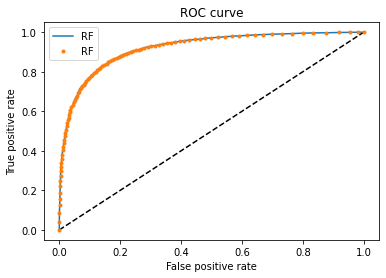

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_grd_rfcat = rf.predict_proba(X_testdata)[:, 1]

#la prof ha usato il comando commentato e funzionava... aveva testlabel che
#era già un dataframe
#fpr_rf, tpr_rf, _ = roc_curve(y_testlabel.values.flatten()=="s", y_pred_grd_rfcat)

#NOTA CHE ROC_CURVE VUOLE IN INPUT NELLA X UNA BOOLEAN VALUE
fpr_rf, tpr_rf, _ = roc_curve(y_testlabel=="s", y_pred_grd_rfcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf, tpr_rf, '.', label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



In [65]:
auc(pd.DataFrame(y_testlabel).values.flatten()=="s", y_pred_grd_rfcat)

4074.1749999999997

Questo numero andrebbe comparato con quello del gbt per vedere le performance.

Nb prof: https://github.com/fedhere/MLPNS2021/blob/main/CART/higgsbosonSearch.ipynb

#Lezione 18 t-SNE

Riprendiamo i dati e rimuoviamo i -999.00, e dopo possiamo vedere gli histogrammi per vedere il comportamento delle variabili. 

In [66]:
datahiggs = pd.read_csv("training.csv")

Puliamo i dati di nuovo, prima di usare t-SNE

In [67]:
datahiggs = datahiggs.replace(-999.00, np.nan)

In [68]:
datain = datahiggs.drop(labels=["Label", "Weight", "EventId"], axis=1)
datain.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [69]:
datain = datain.dropna(axis=0, how='any')
datain.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [70]:
datahiggs = datahiggs.dropna(axis=0, how='any')

In [71]:
from sklearn import manifold
import matplotlib.pyplot as plt

In [72]:
#manifold.TSNE?

Provare diverse combinazioni di complexity ed early_exaggeration.

In [73]:
#SETTA IL RANDOM STATE
X_emb = manifold.TSNE(n_components=2, perplexity=30.0).fit_transform(datain.iloc[::10])

In [74]:
X_emb

array([[-25.915133  ,  38.98819   ],
       [ 29.726265  ,  -0.68502927],
       [-11.024091  , -31.773962  ],
       ...,
       [-20.98385   ,  45.700367  ],
       [ 49.394566  ,  11.46268   ],
       [-42.610924  ,  45.858883  ]], dtype=float32)

Se campioniamo più di ogni datain.iloc[::10], ci dobbiamo aspettare una peggiore visualizzazione.

**perplexity** = numero di oggetti nello spaizo del neighborhood per creare la porieione: ha enorme impatto sul risultato

**early exaggeration** = influenza come i cluster vengono visualizzati, ma in base a questo parametro cambia il risultato

Tipicamente con il t-SNE si visualizzano i dati e si vede se le isole rispettano quello che ha trovato il custering. 



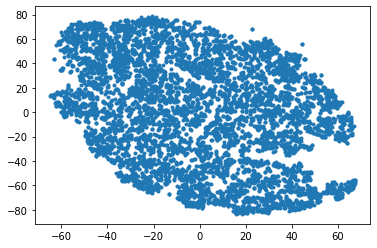

In [75]:
plt.plot(X_emb[:,0], X_emb[:,1], '.')

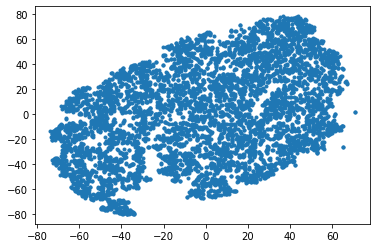

In [76]:
X_emb = manifold.TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0).fit_transform(datain.iloc[::10])
plt.plot(X_emb[:,0], X_emb[:,1], '.')

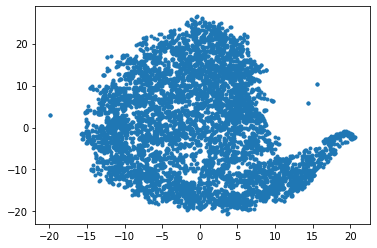

In [77]:
X_emb = manifold.TSNE(n_components=3, perplexity=25.0, 
                      early_exaggeration=10.0).fit_transform(datain.iloc[::10])
plt.plot(X_emb[:,0], X_emb[:,1], '.')

**Questo plot ha degli assi che non rappresentano niente. È l'unico plot in cui non dobbiamo mettere le label perchè è una proiezione completamente astratta. È solo una combinazione delle diverse dimensioni.**

Cambiamo N per i dati campionati ogni N

In [78]:
N = 15

In [79]:
X_emb = manifold.TSNE(n_components=3, perplexity=25.0, 
                      early_exaggeration=10.0, random_state=12).fit_transform(datain.iloc[::N])
plt.plot(X_emb[:,0], X_emb[:,1], '.')

KeyboardInterrupt: ignored

In [ ]:
X_emb.shape

Proviamo a plottare i punti di due colori diversi per signal o bakcground

In [ ]:
sb = datahiggs['Label'].iloc[::N] == 's'
sb

Aggiungiamo ad X_emb i label s o b, presi ogni 15

In [ ]:
X_emb_sb = X_emb[sb]

In [ ]:
X_emb_sb.shape

Creo una figura in cui disegno tutti i punti di X_emb e poi solo i punti con 's' li sovrascrivo con il rosso

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(X_emb[:,0], X_emb[:,1], '.')
plt.plot(X_emb_sb[:,0],X_emb_sb[:,1], '.' ,c='red')

La prof ha eliminato anche una variabile binaria che vedevamo dall'ispeizone delle variabili tipo quella sotto, perchè nel calcolo delle distanze, qusta varibile ha solo valori piccoli o grandi

In [ ]:
pl.pyplot.hist(higgsdata.DER_deltaeta_jet_jet) #questo plot è lo stesso grafico che ho fatto all'nizio